## Importing the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv("weatherAUS.csv")
df.head()
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

## Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Checking for missing values and imputing

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
# Dropping these 4 columns as they have more than 40% missing values and imputing it would create bias
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis = 1, inplace = True) 

In [7]:
df["MinTemp"].fillna(df["MinTemp"].mean(), inplace = True)
df["MaxTemp"].fillna(df["MaxTemp"].mean(), inplace = True)
df["Rainfall"].fillna(df["Rainfall"].mean(), inplace = True)
df["WindGustSpeed"].fillna(df["WindGustSpeed"].mean(), inplace = True)
df["WindSpeed9am"].fillna(df["WindSpeed9am"].mean(), inplace = True)
df["WindSpeed3pm"].fillna(df["WindSpeed3pm"].mean(), inplace = True)
df["Humidity9am"].fillna(df["Humidity9am"].mean(), inplace = True)
df["Humidity3pm"].fillna(df["Humidity3pm"].mean(), inplace = True)
df["Pressure9am"].fillna(df["Pressure9am"].mean(), inplace = True)
df["Pressure3pm"].fillna(df["Pressure3pm"].mean(), inplace = True)
df["Temp9am"].fillna(df["Temp9am"].mean(), inplace = True)
df["Temp3pm"].fillna(df["Temp3pm"].mean(), inplace = True)
df["WindGustDir"].fillna("NW", inplace = True)
df["WindDir9am"].fillna("NWW", inplace = True)
df["WindDir3pm"].fillna("SE", inplace = True)
df["RainToday"].fillna("Yes", inplace = True)

In [8]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Explanatory Data Analysis

In [9]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='MaxTemp', ylabel='Pressure9am'>

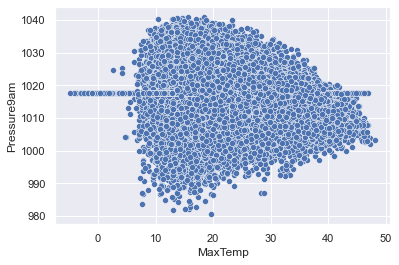

In [10]:
sns.scatterplot(x='MaxTemp',y='Pressure9am',data=df)

<AxesSubplot:xlabel='MaxTemp', ylabel='Pressure3pm'>

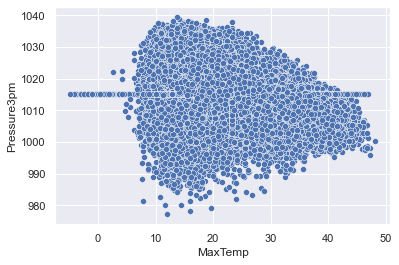

In [11]:
sns.scatterplot(x='MaxTemp',y='Pressure3pm',data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

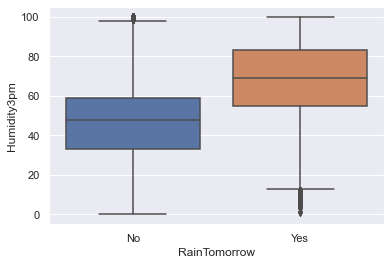

In [12]:
sns.boxplot(x='RainTomorrow',y='Humidity3pm',data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

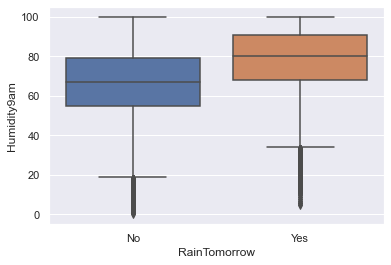

In [13]:
sns.boxplot(x='RainTomorrow',y='Humidity9am',data=df)

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>],
       [<AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RISK_MM'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

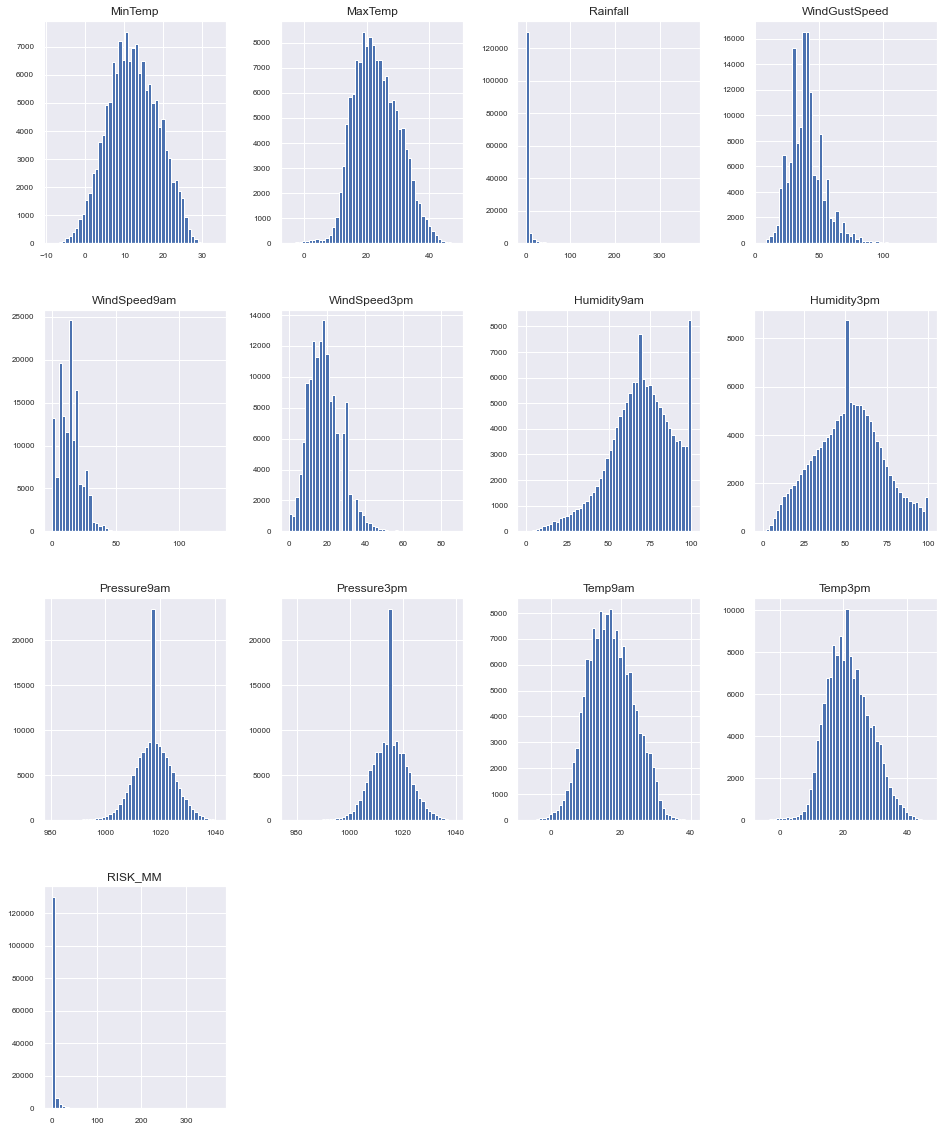

In [14]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Checking for correlation

<AxesSubplot:>

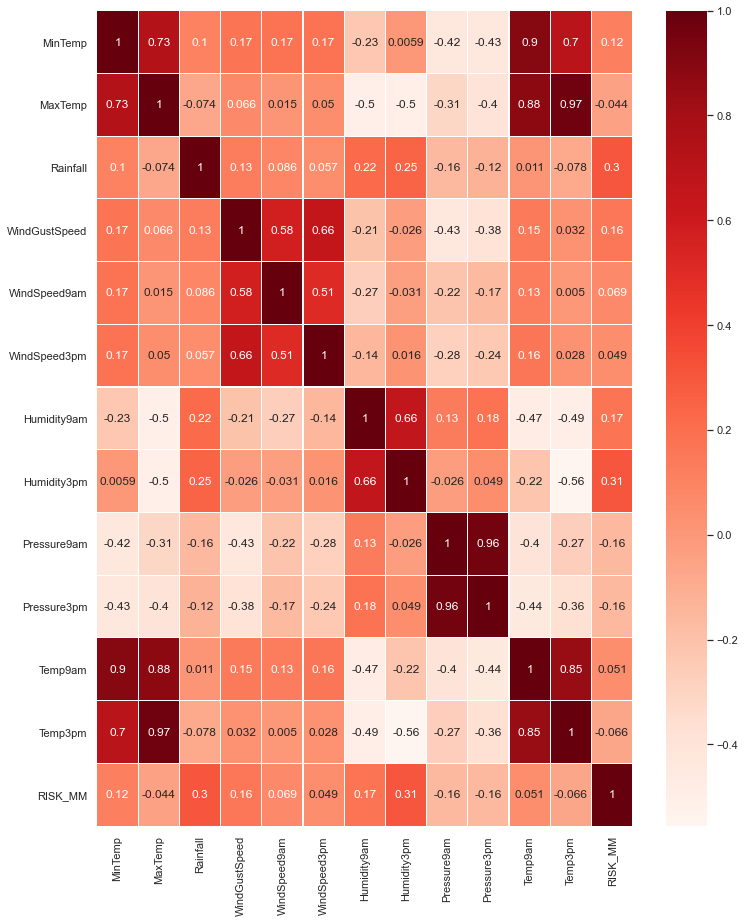

In [15]:
dat_cor =df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,15)) 
sns.heatmap(dat_cor,annot=True,cmap=plt.cm.Reds,linewidths=0.1)

In [17]:
#data= pd.read_csv("weatherAUS.csv")
#data.dropna(inplace=True)
data = df
data['RainTmr'] = np.where(data['RainTomorrow']=='Yes', '1', '0')
data['RainTod'] = np.where(data['RainToday']=='Yes', '1', '0')
##Splitting the Dataset 
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20)
y_train=train_data['RainTmr']
y_test=test_data['RainTmr']
x_train=train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']]
x_test=test_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']]
## Feature Scaling the train dataset
fea_scaling = preprocessing.StandardScaler().fit(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']])
X_train = fea_scaling.transform(x_train[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']])
## Feature scaling the test dataset
fea_scaling = preprocessing.StandardScaler().fit(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']])
X_test = fea_scaling.transform(x_test[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTod']])

In [18]:
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Random Forest

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

ypred = rnd_clf.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print("Confussion matrix:", cm)
print("F1 score:" ,f)

print(accuracy_score(y_test, y_pred))

Confussion matrix: [[58  8]
 [ 3 56]]
F1 score: 0.9105691056910569
0.912


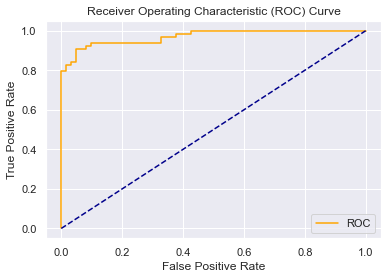

In [20]:
probs = rnd_clf.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

## svm linear

In [21]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'linear', C = C)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C))

In [23]:
print("train:", train)
print("test:", test)
print("Index:", index)

train: [0.504, 0.8133333333333334, 0.84, 0.8453333333333334, 0.848, 0.848]
test: [0.488, 0.832, 0.848, 0.856, 0.856, 0.856]
Index: [0.001, 0.01, 0.1, 1, 10, 100]


In [24]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [25]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.85


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 100)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print("Cross-validation scores: {}",format(scores))

Cross-validation scores: {} [0.9047619  0.73015873 0.88888889 0.87096774 0.82258065 0.82258065]


In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[56 13]
 [ 5 51]]
0.85


## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(X_train,y_train)
y_predicted = model_dt.predict(X_test)


In [29]:
accuracy_score(y_test,y_predicted)

0.816

In [30]:
print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))

[[47 14]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        61
           1       0.80      0.86      0.83        64

    accuracy                           0.82       125
   macro avg       0.82      0.81      0.82       125
weighted avg       0.82      0.82      0.82       125



In [31]:
from sklearn.model_selection import GridSearchCV
opt_tree = DecisionTreeClassifier(random_state = 0)
param_DT = {"max_depth": range(1,20),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,10)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(X_train,y_train)
print(grid_tree.best_params_)
print(grid_tree.score(X_test,y_test))

{'max_depth': 6, 'max_leaf_nodes': 8, 'min_samples_split': 2}
0.904


In [32]:
print("Feature importances:")
print(model_dt.feature_importances_)

Feature importances:
[0.51878234 0.48121766]


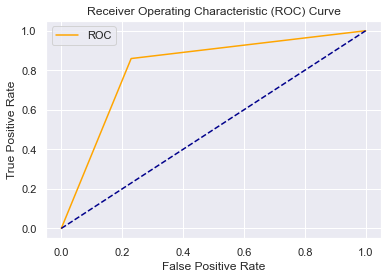

In [33]:
probs = model_dt.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

## Neural Networks

In [34]:
## Library for plotting
import matplotlib.pyplot as plt
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

C:\Users\rashe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\rashe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\rashe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\rashe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
375/375 [==============================] - 0s 936us/step - loss: 0.6883 - accuracy: 0.6987
Epoch 2/10
375/375 [==============================] - 0s 210us/step - loss: 0.5771 - accuracy: 0.8053
Epoch 3/10
375/375 [==============================] - 0s 173us/step - loss: 0.3730 - accuracy: 0.8240
Epoch 4/10
375/375 [==============================] - 0s 197us/step - loss: 0.3430 - accuracy: 0.8347
Epoch 5/10
375/375 [==============================] - 0s 213us/step - loss: 0.3328 - accuracy: 0.8480
Epoch 6/10
375/375 [==============================] - 0s 191us/step - loss: 0.3370 - accuracy: 0.8347
Epoch 7/10
375/375 [==============================] - 0s 184us/step - loss: 0.3352 - accuracy: 0.8427
Epoch 8/10
375/375 [==============================] - 0s 186us/step - loss: 0.3268 - accuracy: 0.8453
Epoch 9/10
375/375 [==============================] - 0s 189us/step - loss: 0.3292 - accu

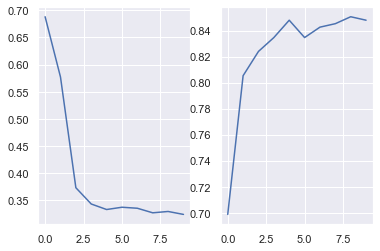

In [35]:
### 3 Hidden Layers - First hidden layer with 100 neurons, second & Third  with 50 & 25 neurons - Activation function we will use relu and sigmoid
input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict = classifier.predict(X_test)
y_predict = np.where(y_predict > 0.5,1,0)
y_test1=np.asarray(y_test)
y_test1=np.reshape(y_test1,(len(y_test1),1))
y_test1=np.concatenate(y_test1).astype(None)
print(confusion_matrix(y_test1,y_predict))  
print(classification_report(y_test1,y_predict))
acc_score1=accuracy_score(y_test1,y_predict)
print(acc_score1)
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 721us/step - loss: 0.6791 - accuracy: 0.7680
Epoch 2/10
375/375 [==============================] - 0s 173us/step - loss: 0.5391 - accuracy: 0.8187
Epoch 3/10
375/375 [==============================] - 0s 192us/step - loss: 0.3787 - accuracy: 0.8187
Epoch 4/10
375/375 [==============================] - 0s 386us/step - loss: 0.3445 - accuracy: 0.8293
Epoch 5/10
375/375 [==============================] - 0s 250us/step - loss: 0.3384 - accuracy: 0.8400
Epoch 6/10
375/375 [==============================] - 0s 194us/step - loss: 0.3337 - accuracy: 0.8373
Epoch 7/10
375/375 [==============================] - 0s 194us/step - loss: 0.3317 - accuracy: 0.8427
Epoch 8/10
375/375 [==============================] - 0s 181us/step - loss: 0.3304 - accuracy: 0.8453
Epoch 9/10
375/375 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.83 - 0s 271us/step - loss: 0.3327 - accuracy: 0.8453
Epoch 10/10
375/375 [===================

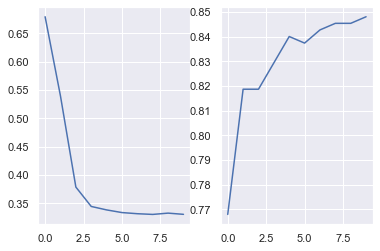

In [36]:
## 2 Hidden Layers - First hidden layer with 50 neurons and second with 25 neurons with activation fucntion tanh and sigmoid

input_shap=15
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist1 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict1 = classifier.predict(X_test)
y_predict1 = np.where(y_predict1 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict1))  
print(classification_report(y_test1,y_predict1))
acc_score2=accuracy_score(y_test1,y_predict1)
print(acc_score2)
plt.subplot(1,2,1)
plt.plot(hist1.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist1.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 883us/step - loss: 0.6554 - accuracy: 0.7120
Epoch 2/10
375/375 [==============================] - 0s 199us/step - loss: 0.4155 - accuracy: 0.8267
Epoch 3/10
375/375 [==============================] - 0s 226us/step - loss: 0.3556 - accuracy: 0.8347
Epoch 4/10
375/375 [==============================] - 0s 239us/step - loss: 0.3459 - accuracy: 0.8427
Epoch 5/10
375/375 [==============================] - 0s 253us/step - loss: 0.3432 - accuracy: 0.8427
Epoch 6/10
375/375 [==============================] - 0s 231us/step - loss: 0.3416 - accuracy: 0.8427
Epoch 7/10
375/375 [==============================] - 0s 210us/step - loss: 0.3431 - accuracy: 0.8400
Epoch 8/10
375/375 [==============================] - 0s 215us/step - loss: 0.3387 - accuracy: 0.8427
Epoch 9/10
375/375 [==============================] - 0s 195us/step - loss: 0.3356 - accuracy: 0.8400
Epoch 10/10
375/375 [==============================] - 0s 199us/step - loss: 0.341

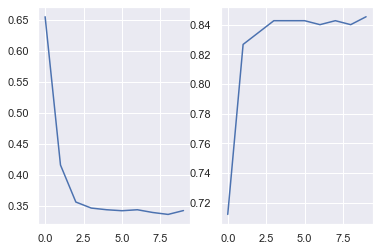

In [37]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with activation fucntion tanh and sigmoid

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist2 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict2 = classifier.predict(X_test)
y_predict2 = np.where(y_predict2 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict2))  
print(classification_report(y_test1,y_predict2))
acc_score3=accuracy_score(y_test1,y_predict2)
print(acc_score3)
plt.subplot(1,2,1)
plt.plot(hist2.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist2.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 880us/step - loss: 0.6223 - accuracy: 0.7280
Epoch 2/10
375/375 [==============================] - 0s 202us/step - loss: 0.4045 - accuracy: 0.8240
Epoch 3/10
375/375 [==============================] - 0s 210us/step - loss: 0.3724 - accuracy: 0.8427
Epoch 4/10
375/375 [==============================] - 0s 226us/step - loss: 0.3652 - accuracy: 0.8560
Epoch 5/10
375/375 [==============================] - 0s 218us/step - loss: 0.3512 - accuracy: 0.8507
Epoch 6/10
375/375 [==============================] - 0s 226us/step - loss: 0.3535 - accuracy: 0.8453
Epoch 7/10
375/375 [==============================] - 0s 253us/step - loss: 0.3514 - accuracy: 0.8453
Epoch 8/10
375/375 [==============================] - 0s 226us/step - loss: 0.3624 - accuracy: 0.8427
Epoch 9/10
375/375 [==============================] - 0s 229us/step - loss: 0.3479 - accuracy: 0.8427
Epoch 10/10
375/375 [==============================] - 0s 223us/step - loss: 0.347

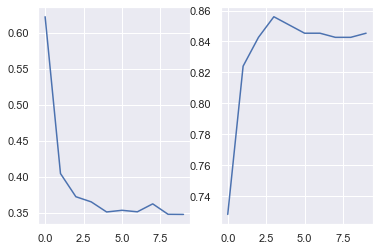

In [38]:
## 4 Hidden Layers - First hidden layer with 150 neurons and second & Third with 100 , 50 & 25 neurons with activation fucntion tanh and sigmoid

input_shap=15
classifier = Sequential()
classifier.add(Dense(150, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist3 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict3 = classifier.predict(X_test)
y_predict3 = np.where(y_predict3 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict3))  
print(classification_report(y_test1,y_predict3))
acc_score4=accuracy_score(y_test1,y_predict3)
print(acc_score4)
plt.subplot(1,2,1)
plt.plot(hist3.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist3.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 1ms/step - loss: 1.8674 - accuracy: 0.5040
Epoch 2/10
375/375 [==============================] - 0s 242us/step - loss: 0.6057 - accuracy: 0.6427
Epoch 3/10
375/375 [==============================] - 0s 223us/step - loss: 0.4306 - accuracy: 0.7707
Epoch 4/10
375/375 [==============================] - 0s 258us/step - loss: 0.4374 - accuracy: 0.7787
Epoch 5/10
375/375 [==============================] - 0s 524us/step - loss: 0.4117 - accuracy: 0.7787
Epoch 6/10
375/375 [==============================] - 0s 263us/step - loss: 0.4000 - accuracy: 0.7733
Epoch 7/10
375/375 [==============================] - 0s 231us/step - loss: 0.4013 - accuracy: 0.7280
Epoch 8/10
375/375 [==============================] - 0s 205us/step - loss: 0.3940 - accuracy: 0.8080
Epoch 9/10
375/375 [==============================] - 0s 223us/step - loss: 0.3948 - accuracy: 0.8347
Epoch 10/10
375/375 [==============================] - 0s 229us/step - loss: 0.4100 

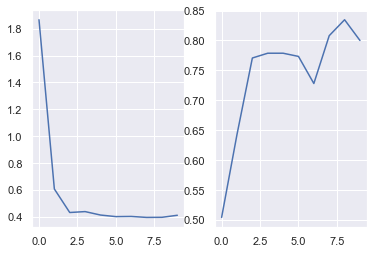

In [39]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion tanh

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'tanh'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'tanh'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist4 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict4 = classifier.predict(X_test)
y_predict4 = np.where(y_predict4 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict4))  
print(classification_report(y_test1,y_predict4))
acc_score5=accuracy_score(y_test1,y_predict4)
print(acc_score5)
plt.subplot(1,2,1)
plt.plot(hist4.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist4.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 2/10
375/375 [==============================] - 0s 205us/step - loss: 0.6936 - accuracy: 0.4773
Epoch 3/10
375/375 [==============================] - 0s 245us/step - loss: 0.6937 - accuracy: 0.4667
Epoch 4/10
375/375 [==============================] - 0s 553us/step - loss: 0.6940 - accuracy: 0.5040
Epoch 5/10
375/375 [==============================] - 0s 223us/step - loss: 0.6929 - accuracy: 0.5040
Epoch 6/10
375/375 [==============================] - 0s 202us/step - loss: 0.6917 - accuracy: 0.5120
Epoch 7/10
375/375 [==============================] - 0s 189us/step - loss: 0.6853 - accuracy: 0.6027
Epoch 8/10
375/375 [==============================] - 0s 210us/step - loss: 0.6518 - accuracy: 0.8000
Epoch 9/10
375/375 [==============================] - 0s 455us/step - loss: 0.5659 - accuracy: 0.8080
Epoch 10/10
375/375 [==============================] - 0s 456us/step - loss: 0.4851 

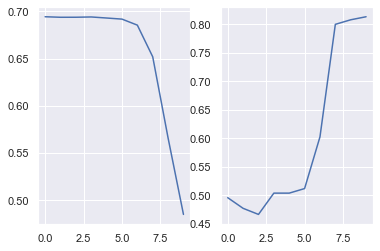

In [40]:
## 3 Hidden Layers - First hidden layer with 100 neurons and second & Third with 50 & 25 neurons with fully activation fucntion sigmoid

input_shap=15
classifier = Sequential()
classifier.add(Dense(100, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'sigmoid'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist5 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict5 = classifier.predict(X_test)
y_predict5 = np.where(y_predict5 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict5))  
print(classification_report(y_test1,y_predict5))
acc_score6=accuracy_score(y_test1,y_predict5)
print(acc_score6)
plt.subplot(1,2,1)
plt.plot(hist5.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist5.history['accuracy'])

Epoch 1/10
375/375 [==============================] - 0s 864us/step - loss: 0.6927 - accuracy: 0.4960
Epoch 2/10
375/375 [==============================] - 0s 202us/step - loss: 0.6752 - accuracy: 0.7040
Epoch 3/10
375/375 [==============================] - 0s 199us/step - loss: 0.5816 - accuracy: 0.8080
Epoch 4/10
375/375 [==============================] - 0s 213us/step - loss: 0.4556 - accuracy: 0.8320
Epoch 5/10
375/375 [==============================] - 0s 210us/step - loss: 0.3751 - accuracy: 0.8400
Epoch 6/10
375/375 [==============================] - 0s 239us/step - loss: 0.3481 - accuracy: 0.8373
Epoch 7/10
375/375 [==============================] - 0s 210us/step - loss: 0.3430 - accuracy: 0.8373
Epoch 8/10
375/375 [==============================] - 0s 223us/step - loss: 0.3387 - accuracy: 0.8427
Epoch 9/10
375/375 [==============================] - 0s 242us/step - loss: 0.3341 - accuracy: 0.8427
Epoch 10/10
375/375 [==============================] - 0s 223us/step - loss: 0.335

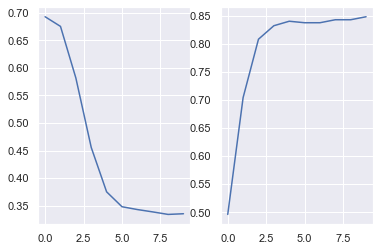

In [41]:
### Experiment various number of neurons with 3 layers and relu function for hidden layers and sigmoid function for the output layers

input_shap=15
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(25, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(12, kernel_initializer='uniform', activation= 'relu'))
classifier.add(Dense(1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer= 'adam',loss='binary_crossentropy', metrics=['accuracy'])
hist6 = classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)
y_predict6 = classifier.predict(X_test)
y_predict6 = np.where(y_predict6 > 0.5,1,0)
print(confusion_matrix(y_test1,y_predict6))  
print(classification_report(y_test1,y_predict6))
acc_score7=accuracy_score(y_test1,y_predict6)
print(acc_score7)
plt.subplot(1,2,1)
plt.plot(hist6.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist6.history['accuracy'])

Text(0.5, 1.0, 'Train and Test Accuracy as a function of Number of Hidden Layers in ANN')

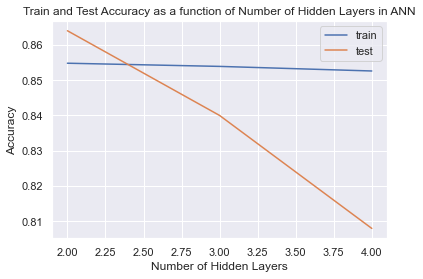

In [42]:
### plots for Train and Test accuracy as a function of Number of layers
test_accuracy = [acc_score2,acc_score3,acc_score4]
train_accuracy=[0.8548,0.8539,0.8526]
layers=[2,3,4]
plt.plot(layers,train_accuracy,label='train')
plt.plot(layers,test_accuracy,label='test')
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and Test Accuracy as a function of Number of Hidden Layers in ANN")

Text(0.5, 1.0, 'Train and Test Accuracy for various Activation functions in ANN')

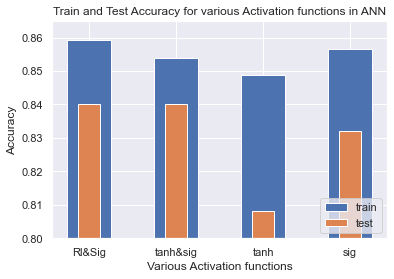

In [43]:
### plots for Train and Test accuracy for various activation functions
test_accuracy = [acc_score1,acc_score3,acc_score5,acc_score6]
train_accuracy=[0.8592,0.8539,0.8488,0.8566]
Act_fun=["Rl&Sig","tanh&sig","tanh","sig"]

plt.bar(Act_fun,train_accuracy,label='train',width=0.5)
plt.bar(Act_fun,test_accuracy,label='test',width=0.25)
plt.xlabel("Various Activation functions")
plt.ylim([0.80, 0.865])
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and Test Accuracy for various Activation functions in ANN")

## Logistic Regression 

Train score: 0.8427
Test score: 0.8640


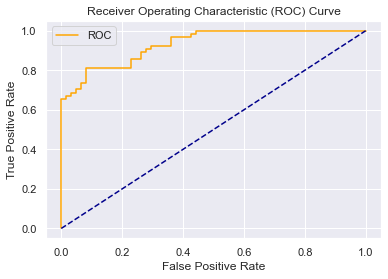

In [44]:
from sklearn.linear_model import LogisticRegression

log_l2 = LogisticRegression(penalty = 'l2', C = 1)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)
print("Train score: %.4f"%log_l2.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print("Test score: %.4f"%log_l2.score(X_test, y_test))

probs = log_l2.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

Train score: 0.8453
Test score: 0.8640


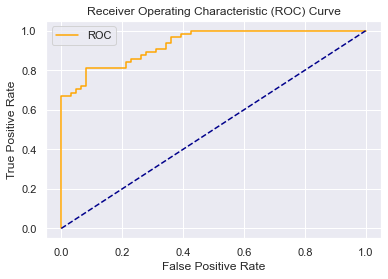

In [45]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1,solver='saga')
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print("Train score: %.4f"%log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print("Test score: %.4f"%log_l1.score(X_test, y_test))

probs = log_l1.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

In [46]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [47]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.84


In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l2', C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)

Cross-validation scores:[0.9047619  0.73015873 0.88888889 0.85483871 0.82258065 0.82258065]


In [49]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l2', C = 1)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
cm = confusion_matrix(ypred,y_test)
print(cm)

[[56 12]
 [ 5 52]]
